# Finding the edges with Canny

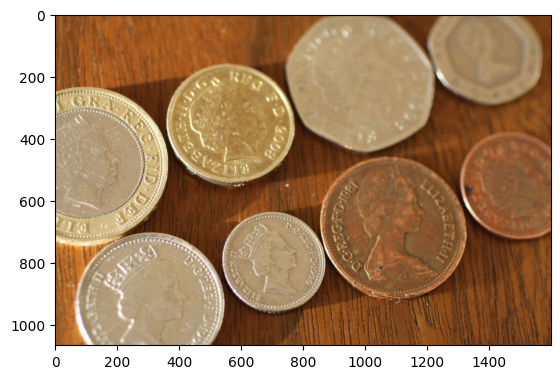

In [1]:
import matplotlib.pyplot as plt

# Load image
coins = plt.imread('coins.jfif')
plt.imshow(coins)

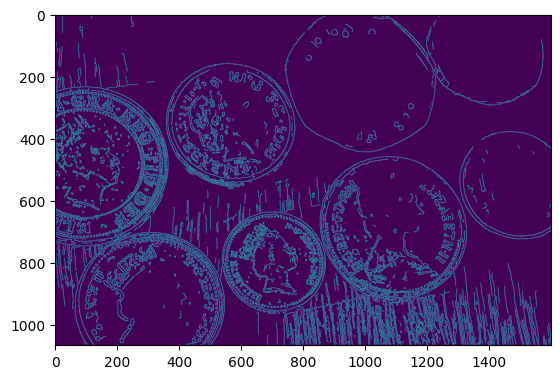

In [2]:
from skimage.feature import canny
from skimage import color

# Convert image to grayscale
coins = color.rgb2gray(coins)

# Apply Canny detector
canny_edges = canny(coins)

# Show resulted image with edges
plt.imshow(canny_edges)

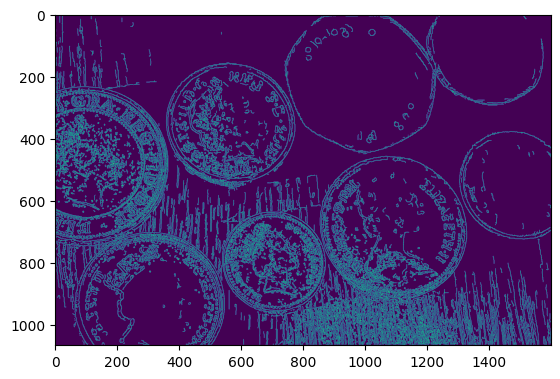

In [3]:
# Apply Canny detector with a sigma of 0.5
canny_edges_0_5 = canny(coins, sigma=0.5)

plt.imshow(canny_edges_0_5)

**Notes:** The first step of this algorithm is to apply a gaussian filter in order to remove noise in the image. So, in the canny function you can optionally set the intensity of this Gaussian filter to be applied in the image, by using the sigma attribute. The lower the value of this sigma, the less of gaussian filter effect is applied on the image, so it will spot more edges. On the other hand, if you set a higher value, more noise will be removed and the result is going to be a less edgy image. The default value of this parameter is 1. 

# Corner detection - Using Harris corner detector

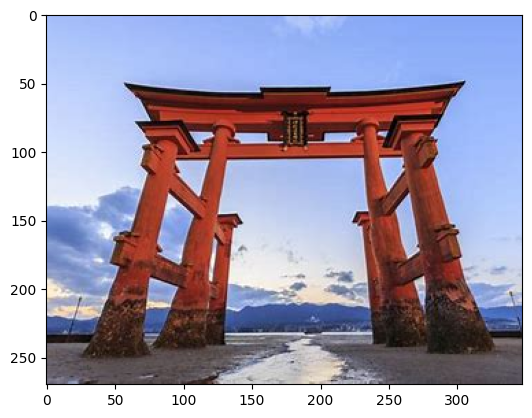

In [4]:
# Load image
gate = plt.imread('gate.jfif')
plt.imshow(gate)

# Convert to grayscale
from skimage.color import rgb2gray
gate_gray = rgb2gray(gate)

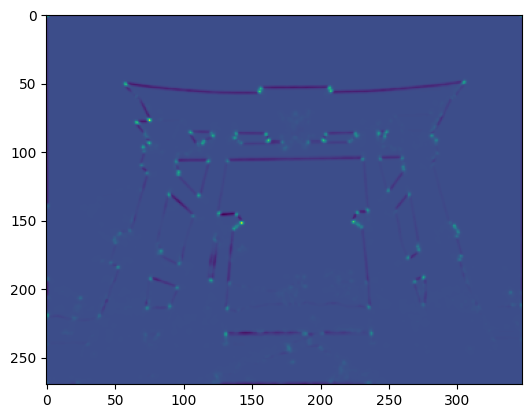

In [5]:
# Corner detection
from skimage.feature import corner_harris

measure_image = corner_harris(gate_gray)
plt.imshow(measure_image)

# Detecting faces

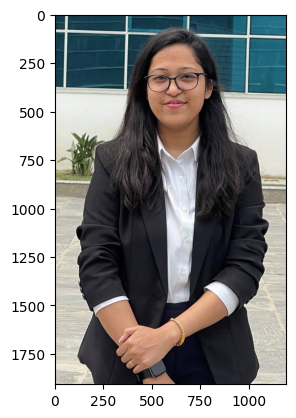

In [7]:
# Load the image
image = plt.imread('my_formal_pic.jpg')
plt.imshow(image)

In [8]:
from skimage import data

# Import the classifier class
from skimage.feature import Cascade

# Load the trained file from themodule root
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

In [9]:
detector

In [10]:
# Apply detector on the image
detected = detector.detect_multi_scale(img=image,
                                      scale_factor=1.2, #<- scale factor by which the searching window is multiplied in each step
                                      step_ratio=1, #<-- a step ratio, in which 1 represents an exhaustive search and usually is slow. By setting this parameter to higher values the results will be worse but the computation will be much faster. 
                                      min_size=(10,10),
                                      max_size=(200,200))

In [11]:
detected

[{'r': 431, 'c': 870, 'width': 44, 'height': 44}]

**Note:** The detector will return the coordinates of the box that contains the face. When printing the result, we see that it's a dictionary, where r represents the row position of the top left corner of the detected window, c is the column position pixel, width is width of detected window, and height, the height of the detected window.